## 1. UNDERSTANDING THE GIVEN TASK
#### Task Given by instructor Krish Naik
* Solve in ipynb:
1. Import the dataset.
https://archive.ics.uci.edu/ml/datasets/Algerian+Forest+Fires+Dataset++#
2. Do proper EDA(analysis) of your dataset and create a report
3. Then perform necessary preprocessing steps

## 2. DATA COLLECTION AND UNDERSTANDING

* I used a dataset on **Algerian Forest Fires** from UCI. The dataset contains a culmination of forest fire observations and data in two regions of Algeria: the Bejaia region and the Sidi Bel-Abbes region. The timeline of this dataset is from **June 2012 to September 2012**. In this project, we focused on whether certain weather features could predict forest fires in these regions using few Classification algorithms.


* As per the Task given i choose regression problem to predict fire weather index


# 3. ATTRIBUTE INFORMATION:

- Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
- Weather data observations 2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
- RH : Relative Humidity in %: 21 to 90
- Ws :Wind speed in km/h: 6 to 29
-Rain: total day in mm: 0 to 16.8 FWI Components
- Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
- Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
- Drought Code (DC) index from the FWI system: 7 to 220.4
- Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
- Buildup Index (BUI) index from the FWI system: 1.1 to 68
- Fire Weather Index (FWI) Index: 0 to 31.1
- Classes: two classes, namely Fire and not Fire

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

import os

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 

In [3]:
df = pd.read_csv("Algerian_forest_fire_cleaned_dataset")

In [4]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0.0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0.0


In [5]:
df.shape

(243, 15)

In [6]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

#### Drop month,day and year

In [7]:
df = df.drop(['day', 'month', 'year'],axis=1)

In [8]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0.0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  243 non-null    int64  
 1   RH           243 non-null    int64  
 2   Ws           243 non-null    int64  
 3   Rain         243 non-null    float64
 4   FFMC         243 non-null    float64
 5   DMC          243 non-null    float64
 6   DC           243 non-null    float64
 7   ISI          243 non-null    float64
 8   BUI          243 non-null    float64
 9   FWI          243 non-null    float64
 10  Classes      243 non-null    object 
 11  Region       243 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 22.9+ KB


In [10]:
df.describe()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [11]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [12]:
## Encoding
df['Classes']= np.where(df['Classes'].str.contains("not fire"),0,1)

In [13]:
df["Classes"].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [14]:
## Independent(X) And Dependent(y) features

X = df.drop('FWI',axis=1)

y = df['FWI']

In [15]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0.0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0.0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0.0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0.0


In [16]:
y.head()

0    0.5
1    0.4
2    0.1
3    0.0
4    0.5
Name: FWI, dtype: float64

In [17]:
X.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.586639,0.089408
Classes,0.516015,-0.432161,-0.069964,-0.379097,0.769492,0.585658,0.511123,0.735197,0.586639,1.000000,0.162347


<Axes: >

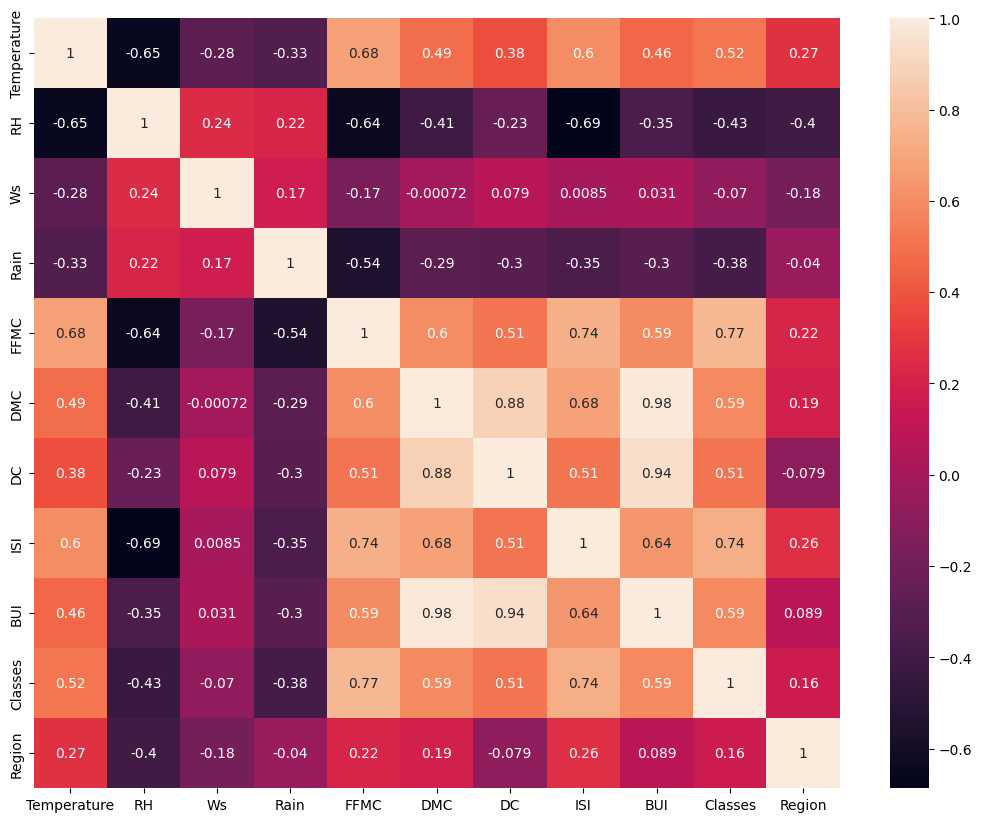

In [18]:
plt.figure(figsize=(13,10))
sns.heatmap(X.corr(),annot=True)

In [19]:
def corelation(dataset, treshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs (corr_matrix.iloc[i,j]) > treshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [20]:
corr_features = corelation(X,0.85)

In [21]:
corr_features

{'BUI', 'DC'}

In [22]:
X = X.drop(corr_features,axis=1)

In [23]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region
0,29,57,18,0.0,65.7,3.4,1.3,0,0.0
1,29,61,13,1.3,64.4,4.1,1.0,0,0.0
2,26,82,22,13.1,47.1,2.5,0.3,0,0.0
3,25,89,13,2.5,28.6,1.3,0.0,0,0.0
4,27,77,16,0.0,64.8,3.0,1.2,0,0.0


# Train Test Split

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, ytrain, ytest = train_test_split(X,y, test_size=0.20,random_state=42)

In [25]:
X_train.shape, X_test.shape

((194, 9), (49, 9))

In [26]:
ytrain.shape, ytest.shape

((194,), (49,))

## Feature Scaling Or Standardization

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [28]:
scaled_Xtrain = scaler.fit_transform(X_train)

scaled_Xtest = scaler.transform(X_test)

#### *Box Plots To understand Effect Of Standard Scaler*

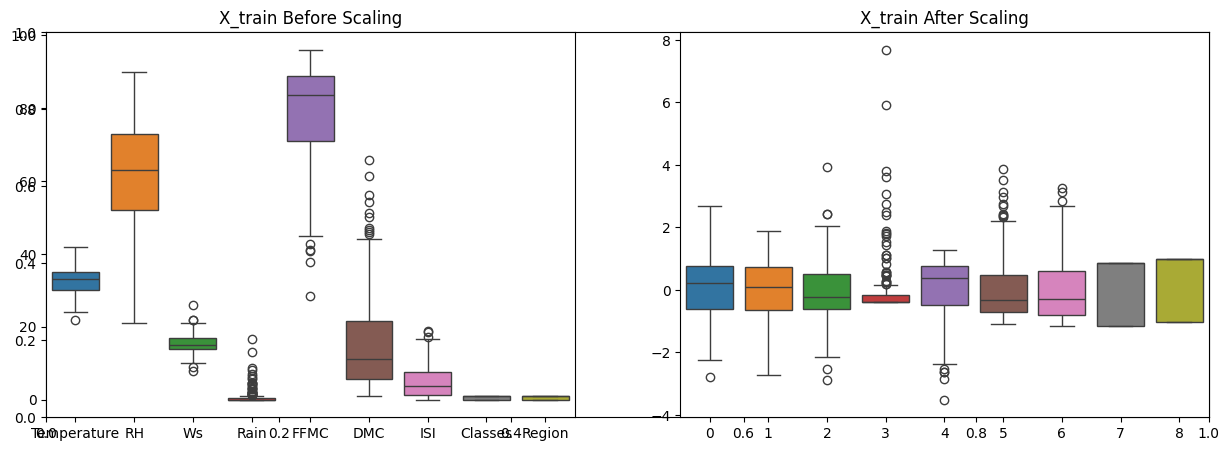

In [29]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=scaled_Xtrain)
plt.title('X_train After Scaling')

plt.show()

-----

##  *Linear Regression Model*

In [30]:
from sklearn.metrics import mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(scaled_Xtrain,ytrain)
y_pred = lr_model.predict(scaled_Xtest)

mae_lr = mean_absolute_error(ytest,y_pred)
result_lr = r2_score(ytest,y_pred)

print("Mean absolute error", mae_lr)
print("R2 Score", result_lr)

Mean absolute error 0.5049978694165663
R2 Score 0.9805895859259883


##  *Ridge Regression Model*

In [31]:
from sklearn.metrics import mean_absolute_error,r2_score
from sklearn.linear_model import Ridge

rr_model = Ridge()
rr_model.fit(scaled_Xtrain,ytrain)
y_pred = rr_model.predict(scaled_Xtest)

mae_rr = mean_absolute_error(ytest,y_pred)
result_rr = r2_score(ytest,y_pred)

print("Mean absolute error", mae_rr)
print("R2 Score", result_rr)

Mean absolute error 0.5192048325844728
R2 Score 0.9801058063273602


##  *lasso Regression Model*

In [32]:
from sklearn.metrics import mean_absolute_error,r2_score
from sklearn.linear_model import Lasso

lsr_model = Lasso()
lsr_model.fit(scaled_Xtrain,ytrain)
y_pred = lsr_model.predict(scaled_Xtest)

mae_lsr = mean_absolute_error(ytest,y_pred)
result_lsr = r2_score(ytest,y_pred)

print("Mean absolute error", mae_lsr)
print("R2 Score", result_lsr)

Mean absolute error 1.0093958923873407
R2 Score 0.9430507350726562


##  *Elasticnet Regression Model*

In [33]:
from sklearn.metrics import mean_absolute_error,r2_score
from sklearn.linear_model import ElasticNet

en_model = ElasticNet()
en_model.fit(scaled_Xtrain,ytrain)
y_pred = lsr_model.predict(scaled_Xtest)

mae_en = mean_absolute_error(ytest,y_pred)
result_en = r2_score(ytest,y_pred)

print("Mean absolute error", mae_en)
print("R2 Score", result_en)

Mean absolute error 1.0093958923873407
R2 Score 0.9430507350726562


Selecting the ridge as our final model

In [35]:
import pickle

pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(rr_model,open('ridge.pkl','wb'))